In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from mpl_toolkits import mplot3d
import librosa
%matplotlib inline

In [3]:
with open("expo", "rb") as f:
    library = pickle.load(f)
library

,Artist,Album,Track,Frequency Mean,Frequency Variance,Shannon Entropy,Spectral Centroids,PCA Total Explained Variance,Kolmogorov Entropy,MSE,Ci,Shannon Rank,PCA Rank,Ci Rank,Aggregate Complexity
0,Afro Celt Sound System,Volume 2 Release (Real World Gold),Big Cat.flac,127.460944,74313.406250,14.404067,"[[681.3984119436806, 598.0110850453357, 426.13...",0.802539,1.248443,"[0.11074866110267886, 0.07801118181549592, 0.0...",0.381290,16.0,1.0,3.0,3.333333
1,"Antonín Dvořák, Joshua Bell, Michael Stern",Voice of the Violin,"Rusalka, Op. 114 Song to the Moon.flac",58.424028,7961.707520,14.061804,"[[438.52377626499185, 459.05529763562214, 464....",0.785810,0.706203,"[0.05241089840802705, 0.07653176529634909, 0.0...",0.437668,8.0,3.0,5.0,2.666667
2,Bob Dylan,Blood On The Tracks,Tangled up in Blue.flac,104.071536,20236.587891,14.103796,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1458...",0.748152,1.686791,"[0.15834062699732515, 0.1785198909758169, 0.17...",0.864678,9.0,14.0,17.0,6.666667
3,Bob Dylan,Infidels,Jokerman.flac,128.479074,51459.460938,14.201671,"[[1731.6078202733045, 1839.2713106637684, 1869...",0.785017,1.720707,"[0.1965647252495622, 0.20203144095502168, 0.17...",0.942081,11.0,4.0,20.0,5.833333
4,Bob Dylan,Time Out Of Mind,Highlands.flac,144.432686,51054.875000,15.121623,"[[0.0, 1406.6905000852876, 1405.7319797434964,...",0.758906,1.270363,"[0.08843401699901664, 0.12442451852667435, 0.1...",0.706018,20.0,12.0,9.0,6.833333
5,Bruce Cockburn,In The Falling Dark,Gavin's Woodpile.flac,68.952018,23831.076172,14.456160,"[[751.5331536193682, 693.1130377716067, 653.07...",0.768364,1.376047,"[0.1315974278006649, 0.17792462891393615, 0.19...",0.916880,17.0,10.0,19.0,7.666667
6,Bruce Springsteen,"Greetings from Asbury Park, N.J",Blinded By The Light.flac,132.257180,19057.591797,13.989682,"[[1965.066552799347, 1904.5165825024242, 1897....",0.705161,1.792556,"[0.1708047155630639, 0.15534796949055624, 0.15...",0.775248,6.0,19.0,13.0,6.333333
7,Chicago,Chicago Transit Authority,Introduction - 2002 Remaster.flac,137.869916,28438.250000,14.245505,"[[0.0, 0.0, 0.0, 3653.8531380705504, 676.26250...",0.724465,1.427089,"[0.16211901040921448, 0.1445648969947406, 0.13...",0.712700,13.0,17.0,11.0,6.833333
8,"Frank Zappa, The Mothers Of Invention",One Size Fits All,Inca Roads.flac,157.329721,56950.046875,14.523524,"[[1887.3634691022994, 1870.0653126205839, 1880...",0.732699,1.620279,"[0.14822017880916652, 0.165622650319639, 0.167...",0.824115,18.0,16.0,14.0,8.000000
9,Grateful Dead,Blues for Allah (2013 Remaster),Crazy Fingers - 2013 Remaster.flac,102.580591,21031.384766,14.271912,"[[1050.1248218313726, 1016.3656766549706, 1019...",0.751243,1.602078,"[0.14640985650462116, 0.16590763854514073, 0.1...",0.843208,14.0,13.0,15.0,7.000000


In [4]:
library["Shannon Rank"] = library["Shannon Entropy"].rank()
library["PCA Rank"] = library["PCA Total Explained Variance"].rank(ascending = False)
library["Ci Rank"] = library["Ci"].rank()
library["Aggregate Complexity"] = library.iloc[:, 11:14].sum(axis = 1)/6

In [5]:
library.sort_values(by = "Aggregate Complexity", ascending = False)

,Artist,Album,Track,Frequency Mean,Frequency Variance,Shannon Entropy,Spectral Centroids,PCA Total Explained Variance,Kolmogorov Entropy,MSE,Ci,Shannon Rank,PCA Rank,Ci Rank,Aggregate Complexity
8,"Frank Zappa, The Mothers Of Invention",One Size Fits All,Inca Roads.flac,157.329721,56950.046875,14.523524,"[[1887.3634691022994, 1870.0653126205839, 1880...",0.732699,1.620279,"[0.14822017880916652, 0.165622650319639, 0.167...",0.824115,18.0,16.0,14.0,8.000000
5,Bruce Cockburn,In The Falling Dark,Gavin's Woodpile.flac,68.952018,23831.076172,14.456160,"[[751.5331536193682, 693.1130377716067, 653.07...",0.768364,1.376047,"[0.1315974278006649, 0.17792462891393615, 0.19...",0.916880,17.0,10.0,19.0,7.666667
10,Grateful Dead,"Dick's Picks Vol. 3 Hollywood Sportatorium, P...","Slipknot! - Live at Pembroke Pines, FL, May 22...",62.148718,9818.716797,14.238907,"[[737.5756229326944, 789.7683869165586, 773.07...",0.747269,1.751021,"[0.17700143340793537, 0.18157875574408866, 0.1...",0.864348,12.0,15.0,16.0,7.166667
9,Grateful Dead,Blues for Allah (2013 Remaster),Crazy Fingers - 2013 Remaster.flac,102.580591,21031.384766,14.271912,"[[1050.1248218313726, 1016.3656766549706, 1019...",0.751243,1.602078,"[0.14640985650462116, 0.16590763854514073, 0.1...",0.843208,14.0,13.0,15.0,7.000000
11,Grateful Dead,Live Dead,"The Eleven - Live in San Francisco, 1969; 2001...",140.503694,52168.484375,14.589777,"[[604.2953875358321, 633.4396443642929, 697.02...",0.759549,1.755326,"[0.16435241357727895, 0.1648616748487356, 0.15...",0.760118,19.0,11.0,12.0,7.000000
4,Bob Dylan,Time Out Of Mind,Highlands.flac,144.432686,51054.875000,15.121623,"[[0.0, 1406.6905000852876, 1405.7319797434964,...",0.758906,1.270363,"[0.08843401699901664, 0.12442451852667435, 0.1...",0.706018,20.0,12.0,9.0,6.833333
7,Chicago,Chicago Transit Authority,Introduction - 2002 Remaster.flac,137.869916,28438.250000,14.245505,"[[0.0, 0.0, 0.0, 3653.8531380705504, 676.26250...",0.724465,1.427089,"[0.16211901040921448, 0.1445648969947406, 0.13...",0.712700,13.0,17.0,11.0,6.833333
2,Bob Dylan,Blood On The Tracks,Tangled up in Blue.flac,104.071536,20236.587891,14.103796,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1458...",0.748152,1.686791,"[0.15834062699732515, 0.1785198909758169, 0.17...",0.864678,9.0,14.0,17.0,6.666667
6,Bruce Springsteen,"Greetings from Asbury Park, N.J",Blinded By The Light.flac,132.257180,19057.591797,13.989682,"[[1965.066552799347, 1904.5165825024242, 1897....",0.705161,1.792556,"[0.1708047155630639, 0.15534796949055624, 0.15...",0.775248,6.0,19.0,13.0,6.333333
17,Queen,Bohemian Rhapsody,Bohemian Rhapsody.flac,71.163858,7809.500000,14.139012,"[[919.6760270068121, 956.3822503449779, 999.01...",0.680666,1.199597,"[0.09978088240699266, 0.12027471631606762, 0.1...",0.622731,10.0,20.0,6.0,6.000000


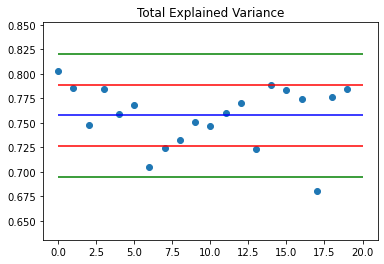

In [6]:
data = library["PCA Total Explained Variance"]
mean = library["PCA Total Explained Variance"].mean()
std = library["PCA Total Explained Variance"].std()
min_value = min(data)
max_value = max(data)

plt.title("Total Explained Variance")
plt.ylim(min_value - 0.05, max_value + 0.05)
plt.scatter(x=library.index, y=data)
plt.hlines(y=mean, xmin=0, xmax=len(data), color = 'b')
plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')

In [7]:
def tailPlot(metric, cat, num):
    count = num
    fig = plt.figure(figsize=(12,8))
    sorts=library.sort_values(by=[metric])
    top = sorts.head(count)
    bot = sorts.tail(count)
    frames=[top,bot]
    together=pd.concat(frames)
    ax = sns.barplot(x=metric, y=cat, data=together)

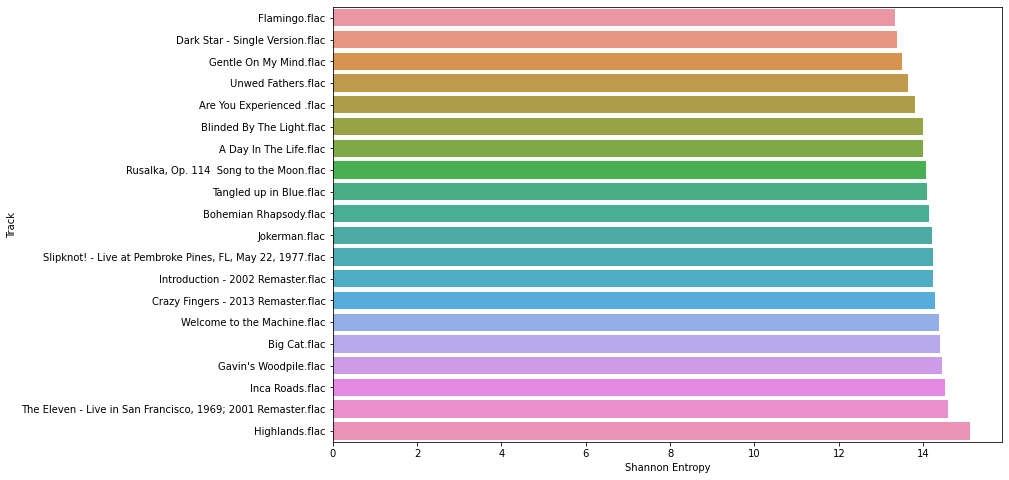

In [8]:
tailPlot("Shannon Entropy","Track", 20)

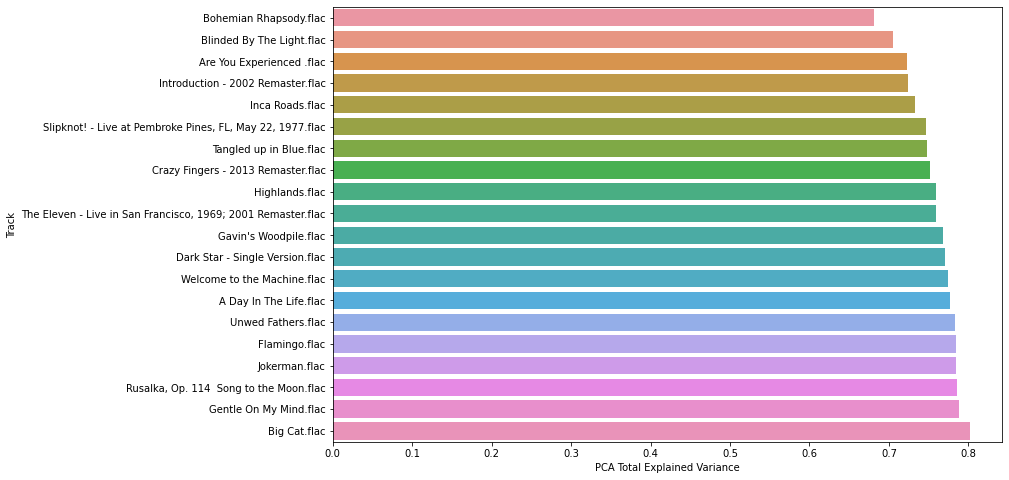

In [9]:
tailPlot("PCA Total Explained Variance","Track", 20)

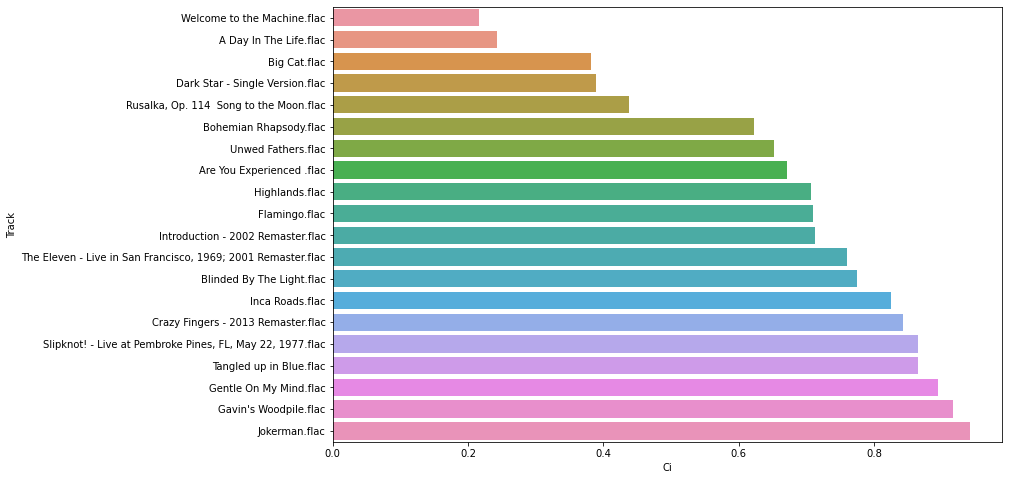

In [10]:
tailPlot("Ci","Track", 20)

In [11]:
with open("expo", "wb") as f:
    pickle.dump(library, f)